Proyek Bangkit Hans
Klasifikasi tingkat kematangan buah pisang menggunakan CNN dan fine tuning

In [5]:
# Extract File

from zipfile import ZipFile

with ZipFile("C:\Data D\Latihan\Teman\Proyek Bangkit_hans\drive-download-20231129T142403Z-001.zip", 'r') as zObject:
    zObject.extractall( 
        path="C:\Data D\Latihan\Teman\Proyek Bangkit_hans\Dataset") 

In [66]:
import os
base_dir = os.path.basename('\Dataset')

In [69]:
kelas = os.listdir(base_dir)
kelas

['Busuk', 'Kurang Matang', 'Matang']

Import Library

In [43]:
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

EDA

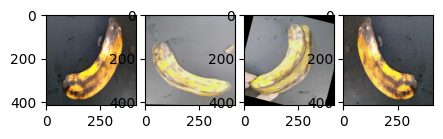

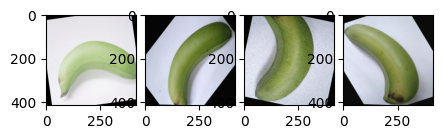

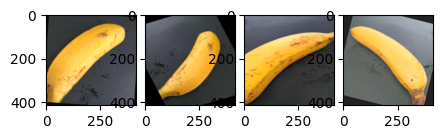

In [46]:
# Menampilkan random sample dari tiap kelas

Image_dir = base_dir
image_file = []
for subdir in os.listdir(Image_dir):
    subdir_path = os.path.join(Image_dir, subdir)
    if os.path.isdir(subdir_path):
        # Get all image files in the subdirectory
        images = [os.path.join(subdir_path, filename) for filename in os.listdir(subdir_path) if filename.endswith((".jpg", ".png", ".jpeg"))]
        # Randomly select 4 image files
        random_images = random.sample(images, 4)
        # Add the selected images to the list of image files
        image_file.extend(random_images)

    # Create a 2x3 grid for displaying the images
    fig, axes = plt.subplots(1, 4, figsize=(5, 5)) #(height, width) & (baris, kolom)
    for i, ax in enumerate(axes.flatten()):
        img = Image.open(random_images[i])
        ax.imshow(img)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

Pre-Processing

In [56]:
img_size = (224, 224) # VGG16 standar
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.25,
    horizontal_flip = True,
    validation_split = 0.3
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.3
)

In [57]:
# Generate the training data
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size= img_size,
    batch_size= batch_size,
    class_mode='categorical',
    subset='training')

# Generate the validation data
val_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size= img_size,
    batch_size= batch_size,
    class_mode='categorical',
    subset='validation')

Found 210 images belonging to 3 classes.


Found 90 images belonging to 3 classes.


['Busuk', 'Kurang Matang', 'Matang']